<a href="https://colab.research.google.com/github/JoaoVitorSesma/Predicao-da-Sobrevida-em-Pacientes-com-Cancer-Colorretal-IC/blob/main/FOSP_curvas_Kaplan_Meier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOSP_curvas_Kaplan-Meier

Gera curvas Kaplan-Meier para um determinado tipo de câncer, a partir da base de dados da FOSP.

In [ ]:
!pip install scikit-survival --quiet
!pip install lifelines --upgrade --quiet
!pip install seaborn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 5.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

# Dados

Todos os tipos de câncer.

In [ ]:
# Banco de dados - Dezembro de 2023
!gdown 1B1qBKob6l-JCOazIko4V6cjK1mIxn2D1 --quiet

In [ ]:
df = pd.read_csv('pacigeral_12_23.csv',low_memory=False)
df.head()

,ESCOLARI,IDADE,SEXO,UFNASC,UFRESID,IBGE,CIDADE,CATEATEND,DTCONSULT,CLINICA,...,REC03,REC04,IBGEATEN,CIDO,DSCCIDO,HABILIT,HABIT11,HABILIT1,HABILIT2,CIDADEH
0,4,17,2,SP,SP,3538709,PIRACICABA,9,2011-06-21,24,...,NaN,NaN,3538709,80003,NEOPLASIA MALIGNA,9,UNACON com Serviços de Radioterapia e de Hemat...,1,1,Piracicaba
1,9,1,2,SP,SP,3535507,PARAGUACU PAULISTA,9,2005-02-25,3,...,NaN,NaN,3506003,80003,NEOPLASIA MALIGNA,14,Inativo,6,5,Bauru
2,9,18,2,SP,SP,3548500,SANTOS,9,2012-05-14,24,...,NaN,NaN,3548500,80003,NEOPLASIA MALIGNA,2,UNACON com Serviço de Radioterapia,1,1,Santos
3,5,19,1,RR,SP,3548500,SANTOS,1,2017-08-10,31,...,NaN,NaN,3548500,80003,NEOPLASIA MALIGNA,2,UNACON com Serviço de Radioterapia,1,1,Santos
4,4,16,1,SP,SP,3548500,SANTOS,2,2020-04-17,31,...,NaN,NaN,3548500,80003,NEOPLASIA MALIGNA,2,UNACON com Serviço de Radioterapia,1,1,Santos


## Tipos de Câncer `TOPOGRUP`



In [ ]:
df.groupby('TOPOGRUP').size()

,0
TOPOGRUP,
C00,3557
C01,5624
C02,8837
C03,1206
C04,4211
...,...
C74,1337
C75,907
C76,4377


## Código dos principais tipos de câncer `TOPOGRUP`

A validar e verificar outros tipos.

In [ ]:
# Texto da lista
texto = """
Câncer de Boca e Orofaringe: C00-C14 (Inclui regiões como lábio, língua, gengiva, assoalho da boca, palato, glândulas salivares, amígdalas e faringe).
Câncer de Esôfago e Estômago: C15-C16 (Esôfago e estômago).
Câncer de Colorretal: C18-C20 (Cólon, junção retossigmoide e reto).
Câncer de Fígado e Vias Biliares: C22-C24 (Fígado, vias biliares intra-hepáticas e vesícula biliar).
Câncer de Pâncreas: C25 (Pâncreas).
Câncer de Pulmão e Brônquios: C34 (Brônquios e pulmões).
Câncer de Pele: C44 (Pele de várias partes do corpo).
Câncer de Mama: C50 (Mama).
Câncer. de Próstata: C61 (Próstata).
"""

# Função para processar cada linha e retornar uma lista com as informações
def processar_linha(linha):
    partes = linha.split(':')
    tipo_cancer = partes[0].strip()
    codigo_e_descricao = partes[1].split('(')
    codigo = codigo_e_descricao[0].strip()
    descricao = codigo_e_descricao[1].strip(')')
    return [tipo_cancer, codigo, descricao]

# Separar as linhas e processar cada uma
linhas = texto.strip().split('\n')
dados = [processar_linha(linha) for linha in linhas]

# Criar o DataFrameC
df_tipos_cancer = pd.DataFrame(dados, columns=['tipo_cancer', 'codigo_tipo_range', 'descricao'])

display(df_tipos_cancer)

,tipo_cancer,codigo_tipo_range,descricao
0,Câncer de Boca e Orofaringe,C00-C14,"Inclui regiões como lábio, língua, gengiva, as..."
1,Câncer de Esôfago e Estômago,C15-C16,Esôfago e estômago).
2,Câncer de Colorretal,C18-C20,"Cólon, junção retossigmoide e reto)."
3,Câncer de Fígado e Vias Biliares,C22-C24,"Fígado, vias biliares intra-hepáticas e vesícu..."
4,Câncer de Pâncreas,C25,Pâncreas).
5,Câncer de Pulmão e Brônquios,C34,Brônquios e pulmões).
6,Câncer de Pele,C44,Pele de várias partes do corpo).
7,Câncer de Mama,C50,Mama).
8,Câncer. de Próstata,C61,Próstata).


# Funções



In [ ]:
#
# gera lista de códigos a partir de um range
#
def criar_lista_codigos(codigo_inicial, codigo_final):
  prefixo = codigo_inicial[:1]  # 'C'
  numero_inicial = int(codigo_inicial[1:])  # '04' -> 4
  numero_final = int(codigo_final[1:])  # '07' -> 7

  lista_codigos = []
  for numero in range(numero_inicial, numero_final + 1):
    codigo = f"{prefixo}{numero:02}"
    lista_codigos.append(codigo)

  return lista_codigos

# uso
codigo_inicial = 'C04'
codigo_final = 'C07'
criar_lista_codigos(codigo_inicial, codigo_final)


['C04', 'C05', 'C06', 'C07']

In [ ]:
#
# seleção por codigos_tipo_cancer
#
def select_data(df, codigos_tipo_cancer):
    """
    Realiza o pré-processamento do DataFrame, incluindo filtros e formatação de colunas.
    """
    df_aux = df.copy()

    # Filtro 1 - Topografia
    df_aux = df_aux[df_aux.TOPOGRUP.isin(codigos_tipo_cancer)]

    # Filtro 2 - Residentes de SP
    df_aux = df_aux[df_aux.UFRESID == 'SP']

    # Filtro 3 - Casos com confirmação microscópica
    df_aux = df_aux[df_aux.BASEDIAG == 3]

    # Filtro 4 - Casos com morfologia 81403
    df_aux = df_aux[df_aux.MORFO == 81403]

    # Filtro 5 - ANODIAG até 2019
    df_aux = df_aux[df_aux.ANODIAG < 2020]

    # Converter as colunas de data para o formato datetime
    list_datas = ['DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTULTINFO']
    for col_data in list_datas:
        df_aux[col_data] = pd.to_datetime(df_aux[col_data])

    # Calcular a diferença entre as datas para criar novas variáveis
    df_aux['ULTIDIAG'] = (df_aux.DTULTINFO - df_aux.DTDIAG).dt.days

    return df_aux




In [ ]:
#
# ajuste dos dados para a análise de sobrevivência
#
def ajustes_para_KaplanMeier(df):
    df_aux = df.copy()
    df_aux = df_aux.reset_index(drop=True)

    # Eliminação de casos onde ULTIDIAG é menor que zero
    df_aux = df_aux[df_aux.ULTIDIAG >= 0]

    # Conversão de 'ULTIDIAG' para meses
    df_aux['time'] = (df_aux['ULTIDIAG'] / 30).round()

    # Ajuste da coluna 'ULTINFO' para ser binária (1 = morte / 0 = vivo)
    df_aux['event'] = df_aux['ULTINFO'].apply(lambda x: 1 if x in [3, 4] else 0)

    # Remoção de colunas desnecessárias
    df_aux = df_aux.drop(['ULTIDIAG', 'ULTINFO'], axis=1)

    return df_aux

In [ ]:
#
# criação da curva de sobrevivência Kaplan-Meier
#
def gera_curva_KaplanMeier(df, df_tipos_cancer, lista_tipos_cancer):

  fig = plt.figure(figsize=(7, 5))

  for tipo in lista_tipos_cancer:
    if tipo not in df_tipos_cancer['tipo_cancer'].values:
      print(f'Tipo de câncer não encontrado: {tipo}')
      continue

    codigos_tipo_range = df_tipos_cancer[ df_tipos_cancer['tipo_cancer'] == tipo ]['codigo_tipo_range'].values[0].split('-')
    if len(codigos_tipo_range) > 1:
      codigos_tipo_cancer = criar_lista_codigos(codigos_tipo_range[0], codigos_tipo_range[1])
    else:
      codigos_tipo_cancer = [codigos_tipo_range[0]]

    df_aux = select_data(df, codigos_tipo_cancer).copy()
    df_aux = ajustes_para_KaplanMeier(df_aux)

    kmf = KaplanMeierFitter()
    kmf.fit(df_aux['time'], df_aux['event'], label=tipo)

    # Configuração da visualização da curva de sobrevivência

    ax = kmf.plot_survival_function(ci_show=True, color='red', alpha=0.8)

  plt.plot([],label=f'mediana = {kmf.median_survival_time_} (m)',color='white')
  plt.plot([],label=f'amostras = {len(df_aux)}',color='white')
  plt.plot([],label=f'período = {df.ANODIAG.min(), df.ANODIAG.max()}',color='white')

  plt.title(f'Sobrevivência Kaplan-Meier',weight='bold')
  plt.xlabel('Tempo em meses')
  plt.ylabel('Probabilidade de Sobrevivência')
  plt.legend(loc="best")
  plt.show()

  return fig

# Exemplos de uso

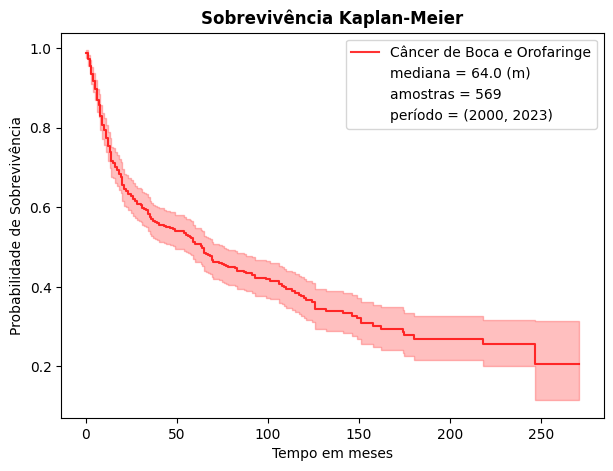

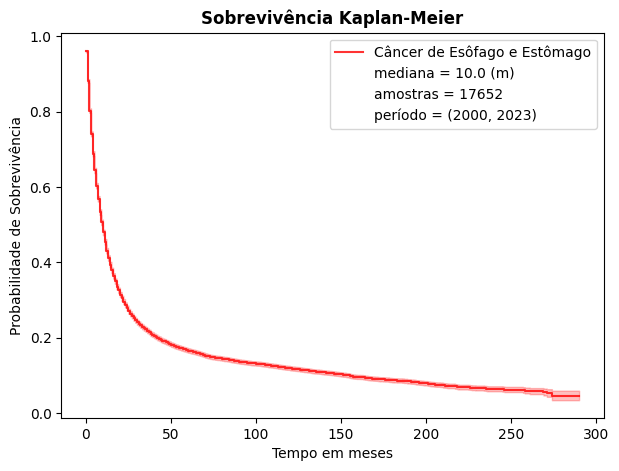

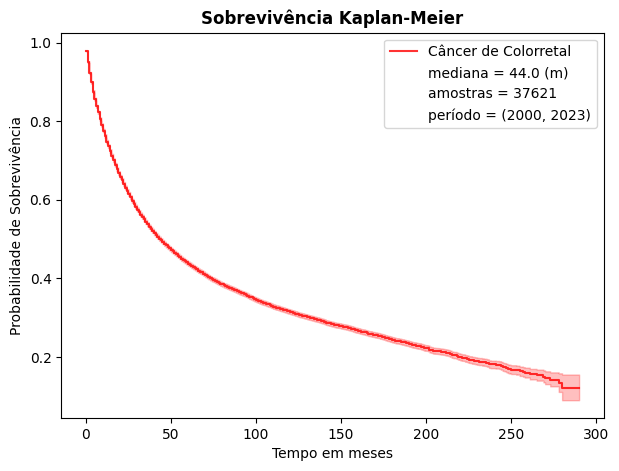

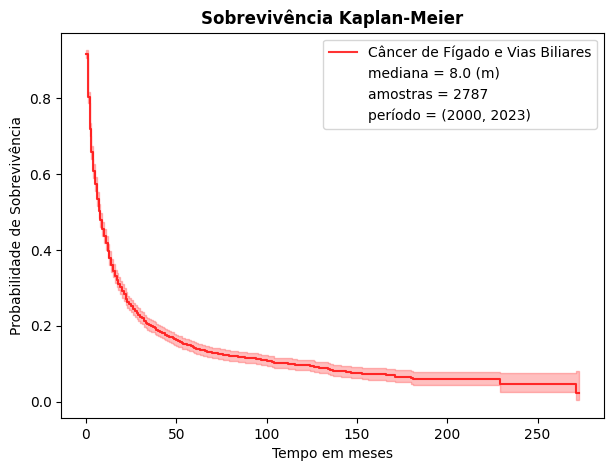

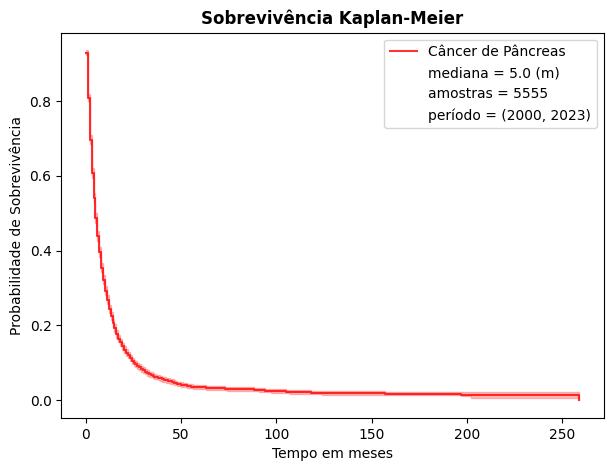

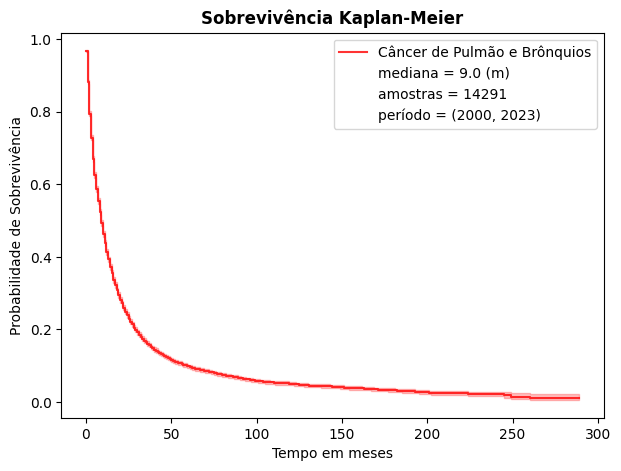

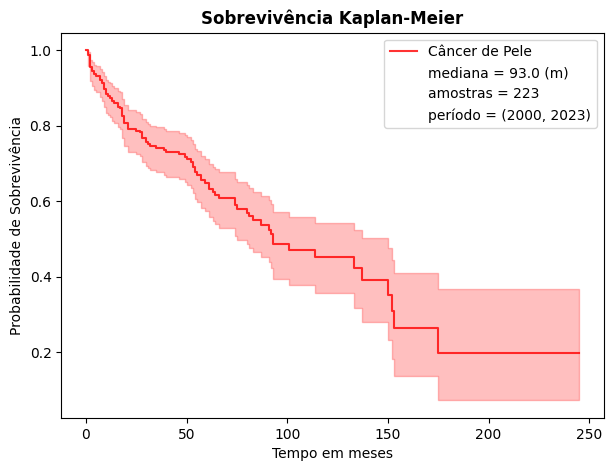

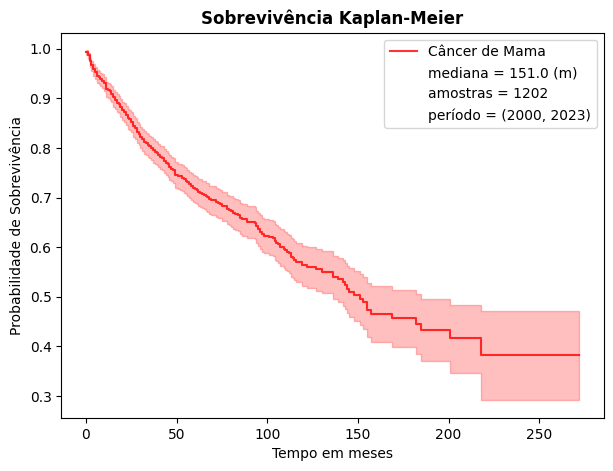

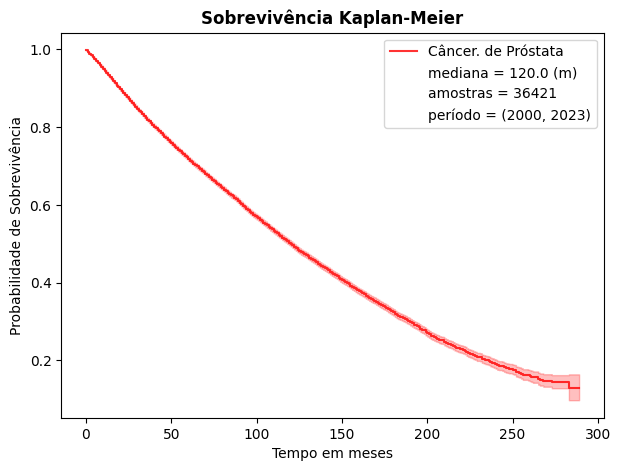

In [ ]:
for tipo in df_tipos_cancer.tipo_cancer.unique():
  fig = gera_curva_KaplanMeier(df, df_tipos_cancer, [tipo])
  fig.savefig(f"{tipo.replace(' ','_').lower()}.png")


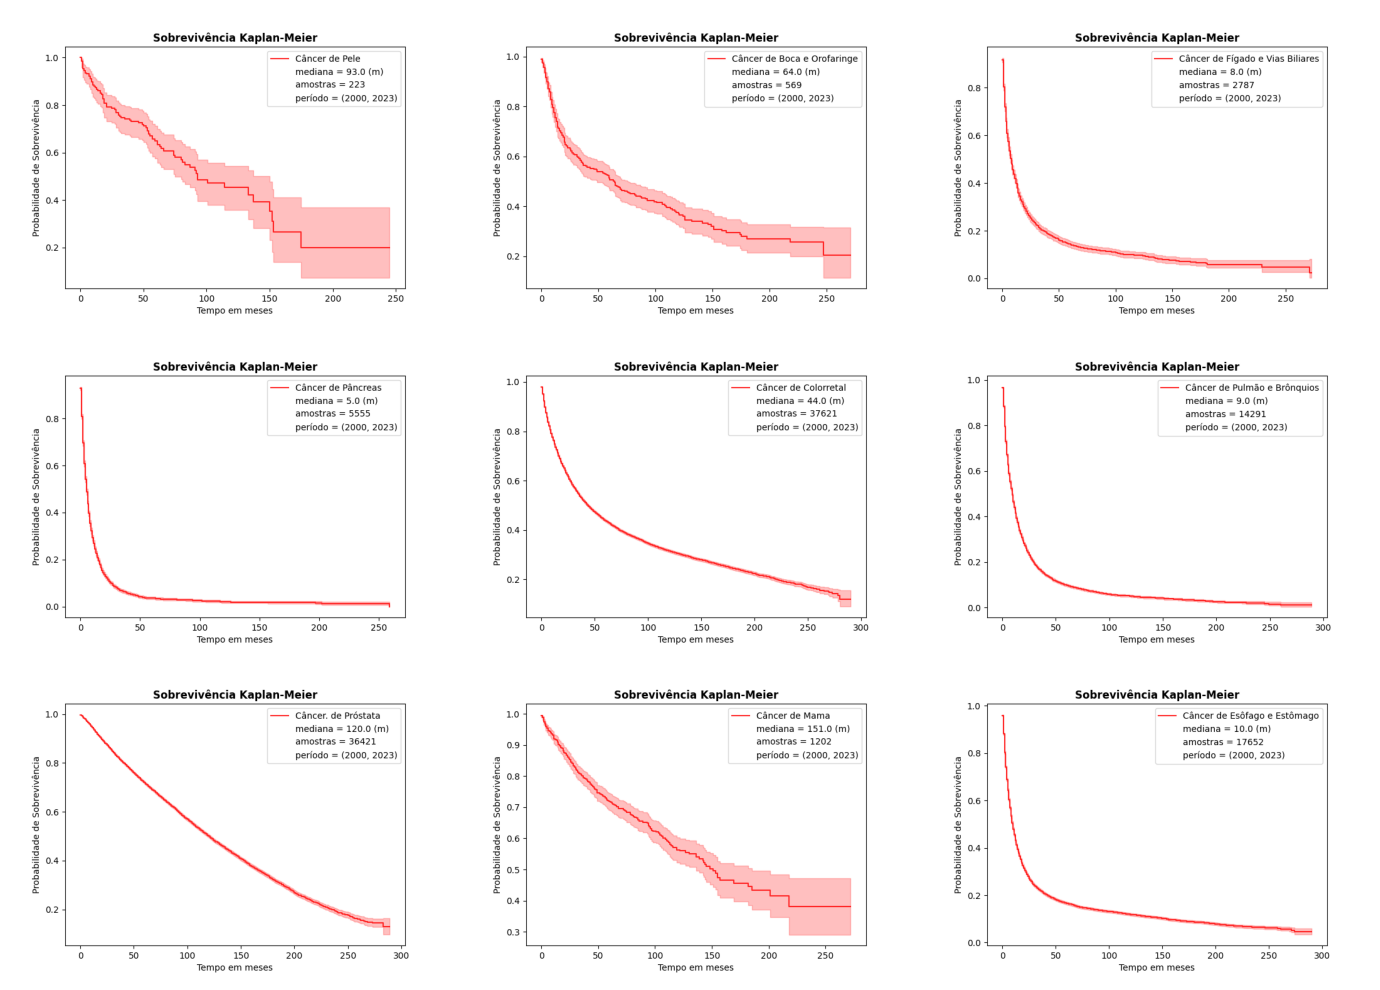

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def load_png_images_from_content(folder_path='/content'):

  image_list = []
  for filename in os.listdir(folder_path):
    if filename.endswith('.png'):
      try:
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)
        image_list.append(image)
      except Exception as e:
        print(f"Error loading image {filename}: {e}")
  return image_list

image_list = load_png_images_from_content()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
ax = axes.flatten()

for i in range(len(image_list)):
  ax[i].imshow(image_list[i])
  ax[i].axis('off')

plt.tight_layout()
plt.show()
